# Treadmill Maximal Exercise Tests
Link: https://physionet.org/content/treadmill-exercise-cardioresp/1.0.1/


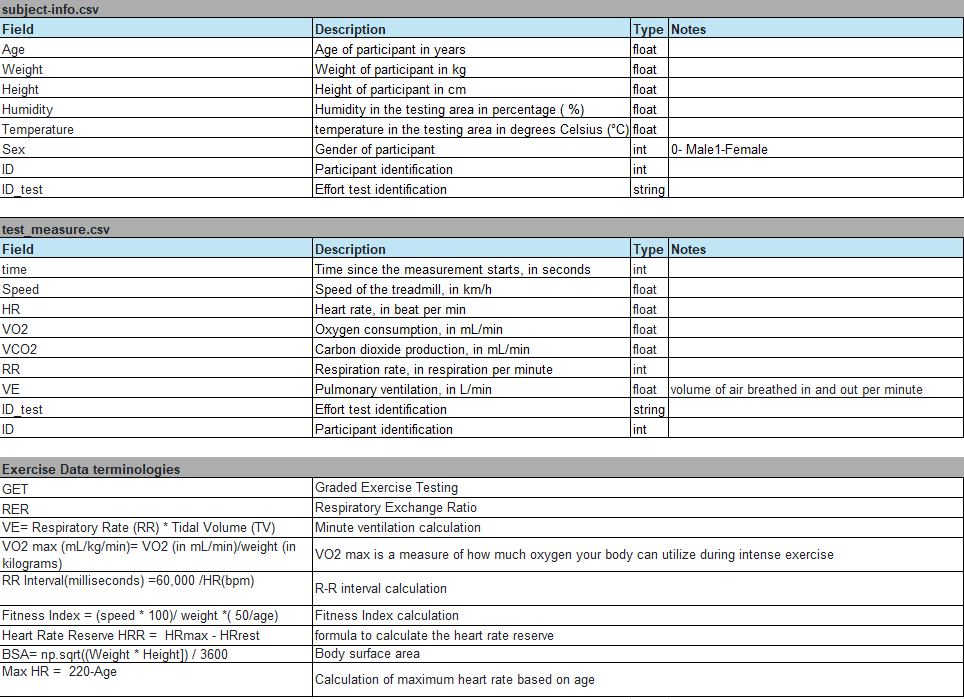


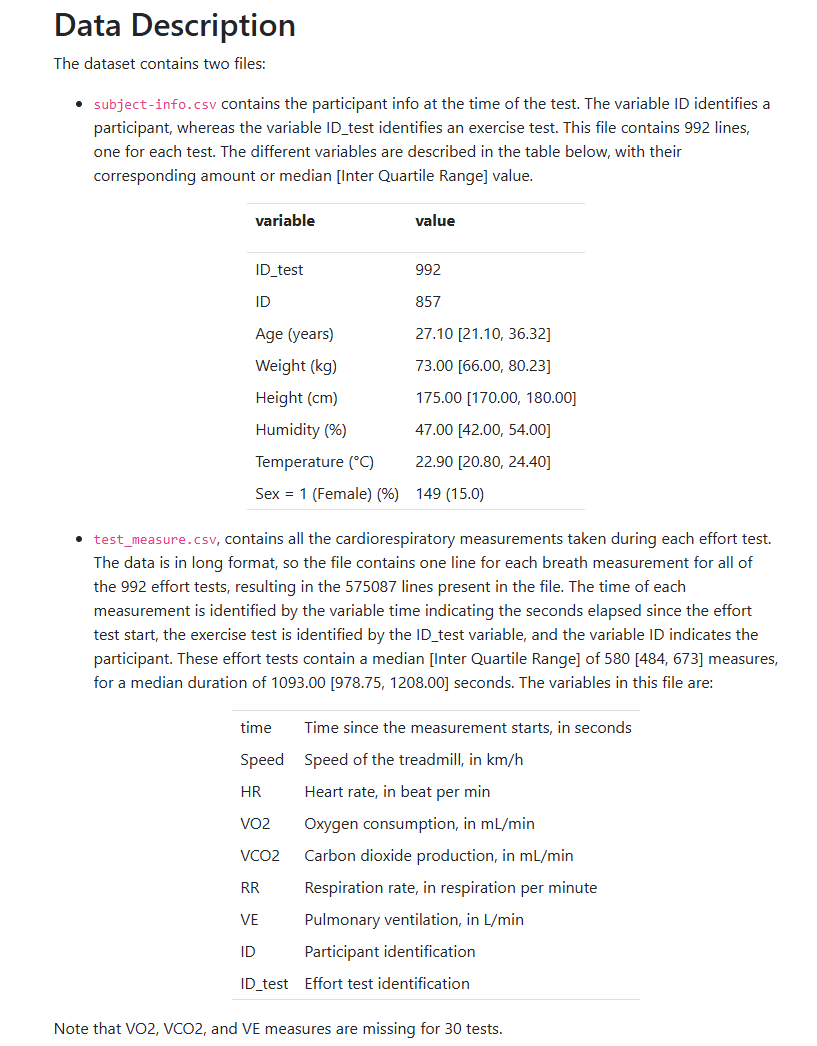


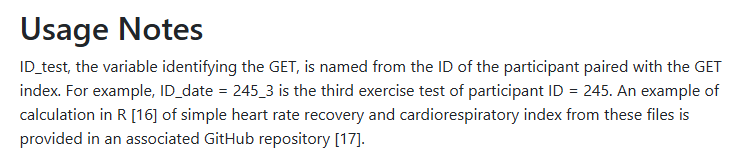

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## Read the datasets - Subject Infromation An Test Measure

### Subject Information Dataset

In [114]:
subject_i = pd.read_csv("subject-info.csv")
subject_i.head()

Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
0  10.8    48.8   163.0      39.0         20.7    1  543   543_1
1  11.8    41.0   150.0      41.0         22.3    1   11    11_1
2  12.2    46.0   160.0      37.0         21.5    0  829   829_1
3  13.2    71.0   190.0      49.0         23.8    1  284   284_1
4  13.7    53.8   169.7      40.0         25.3    0  341   341_1

In [115]:
subject_i.shape

(992, 8)

In [116]:
# Information about the Dataset
subject_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          992 non-null    float64
 1   Weight       992 non-null    float64
 2   Height       992 non-null    float64
 3   Humidity     962 non-null    float64
 4   Temperature  962 non-null    float64
 5   Sex          992 non-null    int64  
 6   ID           992 non-null    int64  
 7   ID_test      992 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 62.1+ KB


In [118]:
subject_df = subject_i

In [119]:
subject_df['Sex'].replace(0,'Male',inplace=True)
subject_df['Sex'].replace(1,'Female',inplace=True)

In [120]:
subject_df.head(10)

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test
0  10.8    48.8   163.0      39.0         20.7  Female  543   543_1
1  11.8    41.0   150.0      41.0         22.3  Female   11    11_1
2  12.2    46.0   160.0      37.0         21.5    Male  829   829_1
3  13.2    71.0   190.0      49.0         23.8  Female  284   284_1
4  13.7    53.8   169.7      40.0         25.3    Male  341   341_1
5  13.8    53.4   171.0      42.0         24.4    Male  341   341_2
6  14.0    46.0   160.0      40.0         25.3    Male  343   343_1
7  14.1    50.0   168.9      42.0         24.2    Male  330   330_1
8  14.1    47.2   160.2      40.0         25.2    Male  338   338_1
9  14.1    49.7   160.1      40.0         25.8    Male  339   339_1

### Test Measure Dataset

In [122]:
test_m = pd.read_csv("test_measure.csv")
test_m.head()

time  Speed  HR    VO2   VCO2    RR    VE ID_test  ID
0     0    0.0 NaN  198.0  233.0  15.0   8.9     1_1   1
1     4    0.0 NaN  286.0  328.0  16.0  10.9     1_1   1
2    10    0.0 NaN  245.0  258.0  10.0   7.9     1_1   1
3    14    0.0 NaN  234.0  252.0  11.0   8.2     1_1   1
4    19    0.0 NaN  250.0  271.0  12.0   8.9     1_1   1

In [123]:
test_m.shape

(575087, 9)

In [124]:
test_df= test_m

### 65. Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes.

In [125]:

Speed  = test_df.groupby('ID')
# taking max speed of the ID
max_speed = Speed['Speed'].max().reset_index()
max_speed.columns = ['ID', 'MaxSpeed']
max_speed['Sex'] = subject_i['Sex']
max_speed.head()

ID  MaxSpeed     Sex
0   1      18.1  Female
1   2      16.3  Female
2   3      18.1    Male
3   4      16.2  Female
4   5      14.4    Male

In [126]:
# Extracting the speed values of the female athletes as a list
female_speed = max_speed[max_speed['Sex'] =='Female']['MaxSpeed'].tolist()
#print(len(female_max_speed))   138
#print(min(female_speed))  7
#print(max(female_speed)) 21.8

In [127]:
#Extracting the speed values of the male athletes as a list
male_speed = max_speed[max_speed['Sex'] =='Male']['MaxSpeed'].tolist()
#print(len(male_speed)) 719
#print(min(male_speed)) 8.5
#print(max(male_speed)) 23.1

In [128]:
#extracting the number of males whose speed is more than 12.94 which is the maximun speed of female athletes
males_greater_than_female_maxspeed = [num for num in male_speed if num > max(female_speed)]
males_greater_than_female_maxspeed # 4 males have  speed more than max. average speed of females

[22.7, 21.9, 23.1, 22.1]

### Final Solution to #65

In [129]:
# To calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes. 
# method 1: if we want only the %of males out of total males
perc1 = (len(males_greater_than_female_maxspeed)/ len(male_speed))* 100

#method2: if we want the %of males out of total males + total females
perc2 = (len(males_greater_than_female_maxspeed)/ (len(male_speed) + len(female_speed)))* 100

print("The % of males out of only the total males who exceeded the maximum treadmill speed of female athletes is", round(perc1,2))
print("The % of males out of total population who exceeded the maximum treadmill speed of female athletes is",round(perc2,2))

The % of males out of only the total males who exceeded the maximum treadmill speed of female athletes is 0.56
The % of males out of total population who exceeded the maximum treadmill speed of female athletes is 0.47


### 66. Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?

In [131]:
#number of test taken by participants
#testcount = test_m.groupby('ID')['ID_test'].count().reset_index()
testcount = test_df.groupby('ID')['ID_test'].nunique().reset_index()

testcount.columns = ['ID', 'testCounts']

In [132]:
# maximum Vo2 level
vo2max = test_df.groupby('ID')['VO2'].max().reset_index()
vo2max.columns = ['ID', 'Vo2Max']

In [133]:
participants_max_vo2 = pd.merge(testcount, vo2max, on='ID')
participants_max_vo2.head()

ID  testCounts  Vo2Max
0   1           1  3267.0
1   2           1  2833.0
2   3           1  3692.0
3   4           1  4110.0
4   5           1  4053.0

In [137]:
#max(participants_max_vo2['testCounts']) #5
#len(participants_max_vo2) #857

In [138]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs= [[{"secondary_y" :True}]])

fig.add_trace(
            go.Scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['Vo2Max'], name = "Max VO2 Values", mode='markers'),
            secondary_y =True
)

fig.add_trace(
            go.Scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['testCounts'], name = "Test Counts", mode='markers',opacity=0.5),
            secondary_y =False
)


fig.update_layout(title_text = "Test Counts with Maximum VO2 Values", title_x =0.5)
fig.update_xaxes(title_text = "ID")
fig.update_yaxes(title_text = "testCounts", secondary_y =False)
fig.update_yaxes(title_text = "Oxygen Consumption", secondary_y =True)


fig.show()

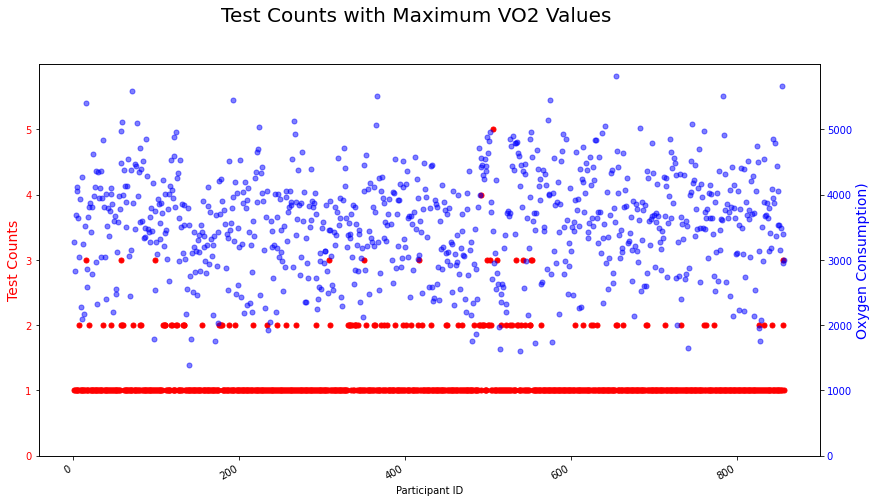

In [139]:
COLOR_1 = "red"
COLOR_2 = "blue"

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

ax1.scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['testCounts'],  color=COLOR_1, s= 25)
ax2.scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['Vo2Max'], color=COLOR_2, alpha= 0.5, s=25)


ax1.set_xlabel("Participant ID")
ax1.set_ylabel("Test Counts", color=COLOR_1, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_1)
ax1.set_ylim([0, 6]) # Set y limit for second y axis
ax1.set_yticks(np.arange(0, 6, 1)) # Set increments for second y axis


ax2.set_ylabel("Oxygen Consumption)", color=COLOR_2, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_2)
ax2.set_ylim([0, 6000]) # Set y limit for second y axis
ax2.set_yticks(np.arange(0, 6000, 1000)) # Set increments for second y axis

fig.suptitle("Test Counts with Maximum VO2 Values", fontsize=20)
fig.autofmt_xdate()

plt.show()

### 67. Create violin chart for any two column from the dataset ?

In [140]:
#Age Category
def age_category(df):
    if df['Age'] > 10 and df['Age'] < 13: 
        return 'Child'
    if df['Age'] >= 13 and df['Age'] < 20: 
        return 'Teen'
    if df['Age'] >= 20 and df['Age'] < 60: 
        return 'Adult'
    if df['Age'] >= 60 : 
        return 'Senior'

subject_df['Age Category'] = subject_df.apply(lambda x : age_category(x), axis = 1)
subject_df.head()

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0  10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1  11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2  12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3  13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4  13.7    53.8   169.7      40.0         25.3    Male  341   341_1   

  Age Category  
0        Child  
1        Child  
2        Child  
3         Teen  
4         Teen

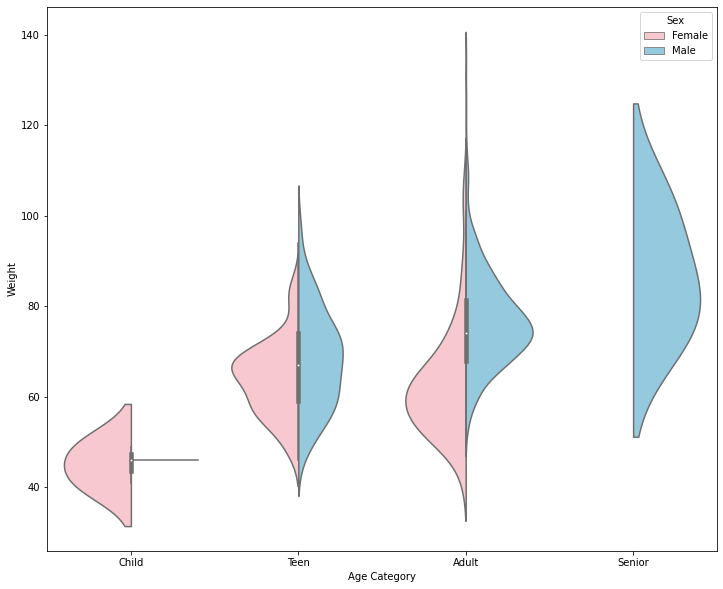

In [141]:
fig =plt.figure(figsize =(12,10))
palette_dict = {'Male': 'Skyblue', 'Female': 'Pink'}
sns.violinplot(x='Age Category' ,y='Weight',data=subject_df, hue='Sex', palette=palette_dict ,split=True)
plt.show()

### 68. Calculate BSA (Body surface area) without using function and store as column in dataframe and categorize.

In [142]:
# Using the most commonly used formula "Du Bois Formula:BSA (m²) = 0.007184 x (Height (cm) ^ 0.725) x (Weight (kg) ^ 0.425)."
#subject_df['BSA'] = round((0.007184 * (subject_df['Height']**0.725) * (subject_df['Weight']**0.425)),2)

subject_df['BSA'] = round(np.sqrt(subject_df['Height']*subject_df['Weight']/3600), 2)

# Categorize BSA
def categorize_bsa(bsa):
    if bsa < 1.6:
        return 'Low'
    elif 1.6 <= bsa < 2.0:
        return 'Average'
    else:
        return 'High'

subject_df['bsa_category'] = subject_df['BSA'].apply(categorize_bsa)

subject_df.head(15)

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0   10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1   11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2   12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3   13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4   13.7    53.8   169.7      40.0         25.3    Male  341   341_1   
5   13.8    53.4   171.0      42.0         24.4    Male  341   341_2   
6   14.0    46.0   160.0      40.0         25.3    Male  343   343_1   
7   14.1    50.0   168.9      42.0         24.2    Male  330   330_1   
8   14.1    47.2   160.2      40.0         25.2    Male  338   338_1   
9   14.1    49.7   160.1      40.0         25.8    Male  339   339_1   
10  14.1    46.6   161.5      41.0         26.5    Male  343   343_5   
11  14.2    65.2   170.1      42.0         24.4    Male  333   333_1   
12  14.2    64.6   175.0      42.0         24.4    Male  335   335_1   
13  14.2    51.0   163.0      42.0         24.4    Male  339   339_5   
14  14.2    57.8   164.2      40.0         25.8    Male  344   344_1   

   Age Category   BSA bsa_category  
0         Child  1.49          Low  
1         Child  1.31          Low  
2         Child  1.43          Low  
3          Teen  1.94      Average  
4          Teen  1.59          Low  
5          Teen  1.59          Low  
6          Teen  1.43          Low  
7          Teen  1.53          Low  
8          Teen  1.45          Low  
9          Teen  1.49          Low  
10         Teen  1.45          Low  
11         Teen  1.76      Average  
12         Teen  1.77      Average  
13         Teen  1.52          Low  
14         Teen  1.62      Average

### 69. Write a python function that efficiently processes large data into chunks to analyze average heart rate and maximum oxygen consumption for each test. Print the chunks during processing.

In [39]:
def treadmill_data(filename, chunk_size= 2000):
    
    print(f"Processing Data in Chunks of {chunk_size} rows...")
    print("---------------------------------------------------")
    for chunk in pd.read_csv(filename, chunksize = chunk_size):
        print("Processing data chunks:")
        print(chunk.head())
        test_ids = chunk['ID_test'].unique()

        for test_id in test_ids:
            test_data = chunk[chunk['ID_test'] == test_id]
            # calculate average heart rate and maximum oxygen consumption 
            avg_heart_rate = test_data['HR'].mean(skipna=True)
            max_oxygen_consumption = test_data['VO2'].max()
            print("\n")
            print(f"Test ID: {test_id}")
            print(f"average heart rate: {avg_heart_rate:.2f}")
            print(f"maximum oxygen consumption: {max_oxygen_consumption:.2f}")
        
        print("-----------------------------------------------------------------")


treadmill_data('test_measure.csv', chunk_size=2000)

Processing Data in Chunks of 2000 rows...
---------------------------------------------------
Processing data chunks:
   time  Speed  HR  VO2   VCO2    RR    VE ID_test  ID
0     0    0.0 NaN  198  233.0  15.0   8.9     1_1   1
1     4    0.0 NaN  286  328.0  16.0  10.9     1_1   1
2    10    0.0 NaN  245  258.0  10.0   7.9     1_1   1
3    14    0.0 NaN  234  252.0  11.0   8.2     1_1   1
4    19    0.0 NaN  250  271.0  12.0   8.9     1_1   1


Test ID: 1_1
average heart rate: 132.68
maximum oxygen consumption: 3267.00


Test ID: 10_1
average heart rate: 158.00
maximum oxygen consumption: 4272.00


Test ID: 100_1
average heart rate: 133.68
maximum oxygen consumption: 3272.00


Test ID: 101_1
average heart rate: 140.32
maximum oxygen consumption: 2539.00
-----------------------------------------------------------------
Processing data chunks:
      time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
2000   570   11.7  167.0  2485  2576  32.0  71.1   101_1  101
2001   571   11.8  17

       time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
30000  1048    5.0  161.0  1386  1881  39.0  64.8   133_1  133
30001  1050    5.0  160.0  1376  1823  40.0  63.3   133_1  133
30002  1051    5.0  159.0  1375  1791  38.0  61.6   133_1  133
30003  1054    5.0  158.0  1401  1797  38.0  61.5   133_1  133
30004  1056    5.0  157.0  1381  1787  37.0  60.8   133_1  133


Test ID: 133_1
average heart rate: 147.61
maximum oxygen consumption: 1409.00


Test ID: 133_4
average heart rate: 159.41
maximum oxygen consumption: 2848.00


Test ID: 134_1
average heart rate: 153.91
maximum oxygen consumption: 3842.00


Test ID: 134_2
average heart rate: 155.49
maximum oxygen consumption: 3075.00
-----------------------------------------------------------------
Processing data chunks:
       time  Speed     HR   VO2  VCO2  RR    VE ID_test   ID
32000   838   16.1  194.0  3011  3189 NaN  96.9   134_2  134
32001   839   16.1  194.0  3027  3199 NaN  96.9   134_2  134
32002   840   16.1  194.0  30



Test ID: 176_1
average heart rate: 157.74
maximum oxygen consumption: 3980.00


Test ID: 176_4
average heart rate: 124.00
maximum oxygen consumption: 4209.00


Test ID: 177_1
average heart rate: 152.52
maximum oxygen consumption: 3204.00


Test ID: 177_28
average heart rate: 158.06
maximum oxygen consumption: 3412.00
-----------------------------------------------------------------
Processing data chunks:
       time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
62000   715   14.9  188  3258  3200  44.0  79.7  177_28  177
62001   717   14.9  189  3270  3217  43.0  80.7  177_28  177
62002   718   14.9  194  3292  3262  42.0  82.2  177_28  177
62003   719   14.9  194  3326  3292  43.0  83.2  177_28  177
62004   720   15.0  194  3264  3246  43.0  83.0  177_28  177


Test ID: 177_28
average heart rate: 175.82
maximum oxygen consumption: 3706.00


Test ID: 178_1
average heart rate: 177.46
maximum oxygen consumption: 3567.00


Test ID: 178_18
average heart rate: 168.40
maximum oxygen co



Test ID: 218_1
average heart rate: 166.94
maximum oxygen consumption: 3373.00


Test ID: 219_1
average heart rate: 154.06
maximum oxygen consumption: 4247.00


Test ID: 22_1
average heart rate: 152.95
maximum oxygen consumption: 2781.00


Test ID: 220_1
average heart rate: 153.00
maximum oxygen consumption: 4342.00
-----------------------------------------------------------------
Processing data chunks:
       time  Speed   HR   VO2  VCO2    RR     VE ID_test   ID
92000   917   17.5  191  4176  5151  53.0  160.4   220_1  220
92001   918   17.5  187  4210  5214  54.0  162.8   220_1  220
92002   919   17.5  187  4278  5311  53.0  165.4   220_1  220
92003   921   17.6  187  4257  5280  56.0  165.9   220_1  220
92004   922   17.6  183  4183  5201  56.0  164.0   220_1  220


Test ID: 220_1
average heart rate: 143.79
maximum oxygen consumption: 4286.00


Test ID: 221_1
average heart rate: 156.88
maximum oxygen consumption: 4655.00


Test ID: 222_1
average heart rate: 164.89
maximum oxygen 

Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
120000   252    6.4  151  1342  1132  32.0  37.2   265_1  265
120001   255    6.4  151  1380  1164  30.0  37.4   265_1  265
120002   256    6.5  152  1378  1162  31.0  37.5   265_1  265
120003   258    6.5  152  1417  1202  30.0  38.4   265_1  265
120004   260    6.5  152  1417  1218  28.0  38.0   265_1  265


Test ID: 265_1
average heart rate: 169.59
maximum oxygen consumption: 2893.00


Test ID: 266_1
average heart rate: 143.07
maximum oxygen consumption: 5124.00


Test ID: 267_1
average heart rate: 119.06
maximum oxygen consumption: 4925.00


Test ID: 268_1
average heart rate: 141.28
maximum oxygen consumption: 3880.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR     VE ID_test   ID
122000   908   17.1  179.0  3841  4239  59.0  124.5   268_1  268
122001   909   17.1  177.0  3808  4215  58.0  124.2   268_1  268

        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
152000   349    8.0  105  2285  1847  28.0  50.3   314_1  314
152001   351    8.0  105  2460  1999  29.0  55.2   314_1  314
152002   354    8.0  105  2444  2036  27.0  57.1   314_1  314
152003   357    8.1  106  2345  1974  26.0  54.9   314_1  314
152004   359    8.1  106  2344  1956  28.0  54.2   314_1  314


Test ID: 314_1
average heart rate: 146.19
maximum oxygen consumption: 3432.00


Test ID: 315_1
average heart rate: 142.94
maximum oxygen consumption: 3809.00


Test ID: 316_1
average heart rate: 149.23
maximum oxygen consumption: 3230.00


Test ID: 317_1
average heart rate: 130.09
maximum oxygen consumption: 3024.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
154000   736   14.5  172  3032  3323  29.0  83.2   317_1  317
154001   738   14.5  172  3051  3357  30.0  85.8   317_1  317
154002   740   14.6  172  3049  



Test ID: 348_1
average heart rate: 161.86
maximum oxygen consumption: 3184.00


Test ID: 349_1
average heart rate: 165.43
maximum oxygen consumption: 2123.00


Test ID: 35_1
average heart rate: 112.13
maximum oxygen consumption: 2856.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test  ID
182000   627   12.2  153.0  2709  2281  44.0  77.2    35_1  35
182001   629   12.2  154.0  2748  2313  44.0  77.7    35_1  35
182002   630   12.2  154.0  2699  2269  44.0  76.2    35_1  35
182003   631   12.3  154.0  2712  2282  44.0  76.4    35_1  35
182004   633   12.3  154.0  2756  2311  45.0  77.9    35_1  35


Test ID: 35_1
average heart rate: 159.57
maximum oxygen consumption: 3949.00


Test ID: 350_1
average heart rate: 170.18
maximum oxygen consumption: 4450.00


Test ID: 351_1
average heart rate: 147.39
maximum oxygen consumption: 1847.00


Test ID: 351_61
average heart rate: 107.16
maximum o

Processing data chunks:
        time  Speed     HR     VO2    VCO2  RR    VE ID_test   ID
206000   872    5.0  150.0  1721.0  1849.0  46  71.3   379_1  379
206001   873    5.0  150.0  1665.0  1793.0  47  69.6   379_1  379
206002   874    5.0  150.0  1643.0  1772.0  47  69.6   379_1  379
206003   876    5.0  149.0  1622.0  1767.0  49  70.4   379_1  379
206004   877    5.0  148.0  1578.0  1718.0  48  69.2   379_1  379


Test ID: 379_1
average heart rate: 143.11
maximum oxygen consumption: 1771.00


Test ID: 38_1
average heart rate: 159.40
maximum oxygen consumption: 3047.00


Test ID: 380_1
average heart rate: 147.34
maximum oxygen consumption: nan


Test ID: 381_1
average heart rate: 164.46
maximum oxygen consumption: 3933.00


Test ID: 382_1
average heart rate: 143.10
maximum oxygen consumption: nan
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR  VO2  VCO2    RR     VE ID_test   ID
208000   682   13.6  178.0  NaN   N

        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
232000   647   12.0  152.0  2587  2644  43.0  82.6   415_1  415
232001   648   12.0  152.0  2520  2492  51.0  81.4   415_1  415
232002   649   12.1  153.0  2597  2590  44.0  82.0   415_1  415
232003   649   12.1  153.0  2498  2377  54.0  78.8   415_1  415
232004   651   12.1  152.0  2528  2300   NaN  79.1   415_1  415


Test ID: 415_1
average heart rate: 154.35
maximum oxygen consumption: 3940.00


Test ID: 416_1
average heart rate: 159.75
maximum oxygen consumption: 2413.00


Test ID: 416_64
average heart rate: 147.39
maximum oxygen consumption: 3008.00


Test ID: 417_1
average heart rate: 137.53
maximum oxygen consumption: 2935.00


Test ID: 417_37
average heart rate: 101.04
maximum oxygen consumption: 1409.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
234000   343    7.9  130.0  1393  1238  26.0  46.5  417_37  

252004   816    5.0  155  2088  2686  38.0  83.7   445_1  445


Test ID: 445_1
average heart rate: 138.74
maximum oxygen consumption: 2302.00


Test ID: 446_1
average heart rate: 152.58
maximum oxygen consumption: 3199.00


Test ID: 447_1
average heart rate: 146.56
maximum oxygen consumption: 3880.00


Test ID: 448_1
average heart rate: 134.43
maximum oxygen consumption: 3763.00


Test ID: 449_1
average heart rate: 118.96
maximum oxygen consumption: 1650.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
254000   305    8.3  144  1706  1501  31.0  45.8   449_1  449
254001   307    8.4  144  1843  1627  31.0  49.2   449_1  449
254002   309    8.4  144  1883  1676  31.0  50.6   449_1  449
254003   311    8.4  144  1864  1681  31.0  50.4   449_1  449
254004   314    8.5  144  1915  1727  30.0  52.0   449_1  449


Test ID: 449_1
average heart rate: 159.77
maximum oxygen consumption: 2953

272004  1283    5.0  111  1477  1658  28.0  54.1   474_1  474


Test ID: 474_1
average heart rate: 104.85
maximum oxygen consumption: 1506.00


Test ID: 475_1
average heart rate: 157.27
maximum oxygen consumption: 3780.00


Test ID: 476_1
average heart rate: 160.36
maximum oxygen consumption: 2768.00


Test ID: 477_1
average heart rate: 145.69
maximum oxygen consumption: 4359.00


Test ID: 478_1
average heart rate: 154.79
maximum oxygen consumption: 2560.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2    VCO2    RR    VE ID_test   ID
274000   629   12.6  185  2272  2121.0  37.0  63.7   478_1  478
274001   630   12.7  185  2243  2083.0  37.0  61.6   478_1  478
274002   632   12.7  185  2289  2117.0  36.0  62.2   478_1  478
274003   634   12.7  185  2360  2171.0  36.0  63.4   478_1  478
274004   635   12.7  185  2441  2237.0  36.0  65.3   478_1  478


Test ID: 478_1
average heart rate: 171.45
maximum oxygen consu

Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR     VE ID_test   ID
294000   761   15.7  178.0  4083  4167  42.0  114.0   499_1  499
294001   763   15.7  178.0  3994  4094  43.0  112.1   499_1  499
294002   764   15.7  178.0  4008  4055  43.0  109.8   499_1  499
294003   765   15.8  178.0  4006  4049  45.0  109.6   499_1  499
294004   766   15.8  178.0  4126  4085  47.0  109.5   499_1  499


Test ID: 499_1
average heart rate: 177.98
maximum oxygen consumption: 4864.00


Test ID: 499_37
average heart rate: 147.34
maximum oxygen consumption: 4886.00


Test ID: 499_48
average heart rate: 135.20
maximum oxygen consumption: 4846.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
296000  1245    5.0  112.0  1837  2311  34.0  67.9  499_48  499
296001  1247    5.0  112.0  1921  2391  33.0  69.4  499_48  499
296002  1248    5.0  111.0  1999  2474  35.0  72.9  499_48  49

        time  Speed   HR   VO2  VCO2  RR    VE ID_test   ID
328000   624   12.6  156  3304  2886  35  75.7   535_1  535
328001   626   12.6  156  3303  2886  35  75.7   535_1  535
328002   628   12.6  156  3367  2956  34  78.1   535_1  535
328003   629   12.7  156  3368  2956  34  78.1   535_1  535
328004   631   12.7  156  3296  2923  33  77.4   535_1  535


Test ID: 535_1
average heart rate: 161.05
maximum oxygen consumption: 4804.00


Test ID: 535_31
average heart rate: 143.83
maximum oxygen consumption: 4722.00


Test ID: 536_1
average heart rate: 157.34
maximum oxygen consumption: 4644.00


Test ID: 536_9
average heart rate: 153.94
maximum oxygen consumption: 4232.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2    VCO2    RR     VE ID_test   ID
330000   939   17.7  200.0  4039  4449.0  56.0  128.3   536_9  536
330001   940   17.8  200.0  3998  4418.0  56.0  127.6   536_9  536
330002   941   17.8  200.0  

364004  1335    4.9  127.0  1754  1797  31.0  68.3   578_1  578


Test ID: 578_1
average heart rate: 124.05
maximum oxygen consumption: 2067.00


Test ID: 579_1
average heart rate: 151.50
maximum oxygen consumption: 3140.00


Test ID: 58_1
average heart rate: 158.08
maximum oxygen consumption: 4485.00


Test ID: 58_18
average heart rate: 151.91
maximum oxygen consumption: 3680.00


Test ID: 58_42
average heart rate: 107.13
maximum oxygen consumption: 1186.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test  ID
366000   104    5.0  106  1058   695  22.0  22.0   58_42  58
366001   106    5.0  106  1058   695  22.0  22.0   58_42  58
366002   109    5.0  106  1007   656  22.0  21.0   58_42  58
366003   112    5.0  107  1018   659  22.0  20.9   58_42  58
366004   118    5.0  107  1051   682  22.0  21.6   58_42  58


Test ID: 58_42
average heart rate: 159.60
maximum oxygen consumption: 3547.00



392004   598    5.4  90.0  1550  1173  36.0  34.2   614_1  614


Test ID: 614_1
average heart rate: 127.84
maximum oxygen consumption: 4725.00


Test ID: 614_18
average heart rate: 119.04
maximum oxygen consumption: 4501.00


Test ID: 615_1
average heart rate: 135.03
maximum oxygen consumption: 4200.00


Test ID: 616_1
average heart rate: 120.05
maximum oxygen consumption: 3108.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
394000   759   13.0  158.0  2930  2476  40.0  73.2   616_1  616
394001   760   13.0  158.0  3001  2517  39.0  73.9   616_1  616
394002   762   13.0  158.0  2898  2465  38.0  73.0   616_1  616
394003   763   13.0  158.0  2988  2525  39.0  75.0   616_1  616
394004   764   13.0  158.0  3212  2704  43.0  81.9   616_1  616


Test ID: 616_1
average heart rate: 154.30
maximum oxygen consumption: 3740.00


Test ID: 617_1
average heart rate: 126.25
maximum oxygen con

Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR     VE ID_test   ID
420000  1045   19.1  176.0  3699  4924  49.0  139.7   652_1  652
420001  1047   19.1  174.0  3714  4955  50.0  141.1   652_1  652
420002  1048   19.1  170.0  3699  4946  49.0  139.8   652_1  652
420003  1049   19.1  164.0  3713  4973  49.0  139.7   652_1  652
420004  1050   19.1  161.0  3715  4987  48.0  140.4   652_1  652


Test ID: 652_1
average heart rate: 151.42
maximum oxygen consumption: 3793.00


Test ID: 653_1
average heart rate: 137.81
maximum oxygen consumption: 3586.00


Test ID: 654_1
average heart rate: 123.14
maximum oxygen consumption: 4254.00


Test ID: 654_74
average heart rate: 126.55
maximum oxygen consumption: 5810.00


Test ID: 655_1
average heart rate: 107.28
maximum oxygen consumption: 2078.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2  RR    VE ID_test   ID
422000   428    9.0  152.0  2078 

444004   244    6.1  120.0  1612  1537  21  39.7   688_1  688


Test ID: 688_1
average heart rate: 149.23
maximum oxygen consumption: 2597.00


Test ID: 689_1
average heart rate: 149.50
maximum oxygen consumption: 3848.00


Test ID: 69_1
average heart rate: 141.56
maximum oxygen consumption: 3149.00


Test ID: 690_1
average heart rate: 151.19
maximum oxygen consumption: 2163.00


Test ID: 690_4
average heart rate: 153.91
maximum oxygen consumption: 2599.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2  RR    VE ID_test   ID
446000   675   15.4  176.0  2508  3037  43  88.5   690_4  690
446001   676   15.4  176.0  2481  3009  44  87.8   690_4  690
446002   678   15.4  176.0  2516  3049  43  88.0   690_4  690
446003   679   15.4  178.0  2478  3020  42  87.8   690_4  690
446004   681   15.4  179.0  2509  3054  42  88.7   690_4  690


Test ID: 690_4
average heart rate: 146.53
maximum oxygen consumption: 2534.

Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
472000   979    4.9  136  2154  3306  35.0  89.1   722_1  722
472001   980    4.9  135  2072  3179  34.0  85.7   722_1  722
472002   982    4.9  134  2009  3097  34.0  83.0   722_1  722
472003   984    4.9  134  1951  3008  33.0  80.7   722_1  722
472004   986    4.9  133  1893  2919  32.0  78.6   722_1  722


Test ID: 722_1
average heart rate: 121.84
maximum oxygen consumption: 2154.00


Test ID: 723_1
average heart rate: 126.03
maximum oxygen consumption: 3876.00


Test ID: 724_1
average heart rate: 142.97
maximum oxygen consumption: 4557.00


Test ID: 725_1
average heart rate: 121.51
maximum oxygen consumption: 4482.00


Test ID: 726_1
average heart rate: 88.99
maximum oxygen consumption: 1866.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
474000   430    7.0  119.0  1891  1393  29.0  41.1 

498004  1183    4.0  113.0  1555  1959  33  57.4  760_23  760


Test ID: 760_23
average heart rate: 110.63
maximum oxygen consumption: 2046.00


Test ID: 761_1
average heart rate: 138.33
maximum oxygen consumption: 3726.00


Test ID: 762_1
average heart rate: 142.21
maximum oxygen consumption: 3474.00


Test ID: 763_1
average heart rate: 141.10
maximum oxygen consumption: 3634.00


Test ID: 763_11
average heart rate: 76.68
maximum oxygen consumption: 971.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed    HR  VO2  VCO2    RR    VE ID_test   ID
500000   527    4.9  76.0  889   791  17.0  20.9  763_11  763
500001   529    4.9  75.0  896   793  18.0  21.1  763_11  763
500002   532    4.9  75.0  914   808  18.0  21.5  763_11  763
500003   535    4.9  75.0  909   806  19.0  21.8  763_11  763
500004   538    4.9  76.0  921   823  20.0  22.4  763_11  763


Test ID: 763_11
average heart rate: 148.05
maximum oxygen consumption: 364

Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR     VE ID_test   ID
522000   647   14.3  169.0  3184  3942  41.0  103.1   796_1  796
522001   648   14.3  169.0  3191  3962  41.0  104.2   796_1  796
522002   649   14.3  169.0  3155  3946  42.0  104.9   796_1  796
522003   651   14.3  170.0  3152  3981  43.0  107.2   796_1  796
522004   652   14.3  170.0  3133  4002  43.0  108.7   796_1  796


Test ID: 796_1
average heart rate: 165.70
maximum oxygen consumption: 3793.00


Test ID: 797_1
average heart rate: 148.30
maximum oxygen consumption: 4145.00


Test ID: 798_1
average heart rate: 153.26
maximum oxygen consumption: 3646.00


Test ID: 799_1
average heart rate: 130.51
maximum oxygen consumption: 2768.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
524000   823   12.0  163.0  2348  2511  44.0  62.2   799_1  799
524001   824   12.0  164.0  2736  2953  53.0  75



Test ID: 856_3
average heart rate: 127.19
maximum oxygen consumption: 2922.00


Test ID: 857_1
average heart rate: 167.27
maximum oxygen consumption: 3002.00


Test ID: 86_1
average heart rate: 107.90
maximum oxygen consumption: 1189.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR  VO2  VCO2    RR    VE ID_test  ID
566000   165    5.0  108  967   804  28.0  24.8    86_1  86
566001   169    5.0  110  961   797  29.0  24.6    86_1  86
566002   170    5.0  109  937   780  26.0  24.1    86_1  86
566003   172    5.0  108  953   788  26.0  24.3    86_1  86
566004   174    5.0  110  953   788  26.0  24.3    86_1  86


Test ID: 86_1
average heart rate: 164.42
maximum oxygen consumption: 3492.00


Test ID: 87_1
average heart rate: 174.82
maximum oxygen consumption: 3352.00


Test ID: 88_1
average heart rate: 156.69
maximum oxygen consumption: 4858.00


Test ID: 89_1
average heart rate: 145.26
maximum oxygen consumption: 324

### 70. How does the body's production of carbon dioxide related to the consumption of oxygen with increasing levels of pulmonary ventilation during GET? 

ve on x axis, vo2 and vco2 on y axis

In [143]:
#Consider Athelete with ID 100 
athlete_100 = test_df[test_df['ID_test']== '100_1'].reset_index()
df= athlete_100
df.head()

index  time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0   1192     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1   1193     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2   1194     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3   1195     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4   1196     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

In [144]:
df.drop('index', axis=1, inplace=True)
df.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

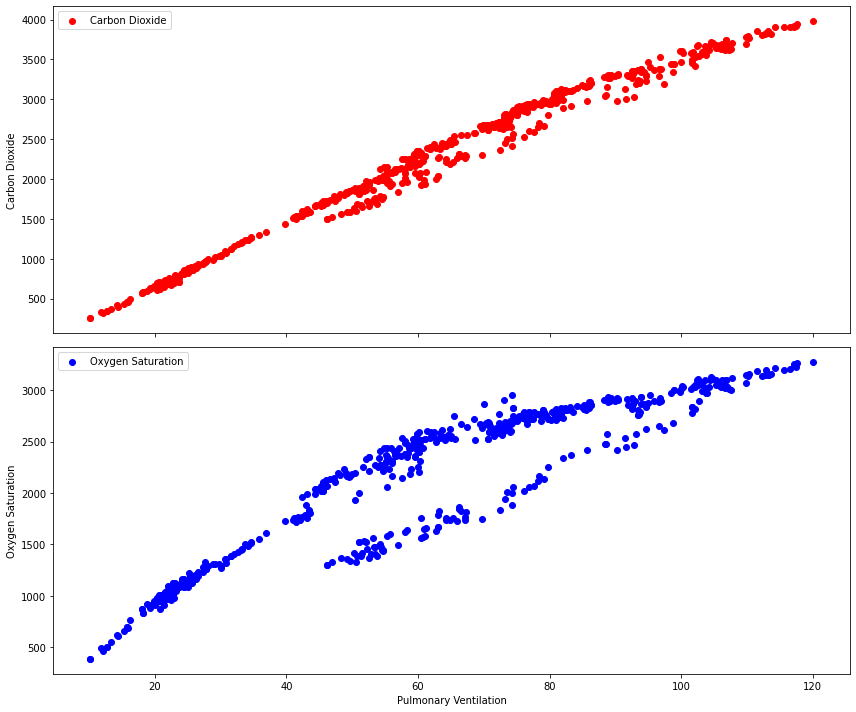

In [145]:
# Method 1: Using matplotlib subplotsdf= athlete_100
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # 2 rows, 1 column

axes[0].scatter(np.array(df['VE']), np.array(df['VCO2']), label='Carbon Dioxide', color='red')
axes[0].set_ylabel('Carbon Dioxide')
axes[0].legend()

axes[1].scatter(np.array(df['VE']), np.array(df['VO2']), label='Oxygen Saturation', color='blue')
axes[1].set_ylabel('Oxygen Saturation')
axes[1].set_xlabel('Pulmonary Ventilation')
axes[1].legend()


plt.tight_layout()
plt.show()


### Analysis: 

It is observed from the plots, as the pulmonary ventilation increases, oxygen consumption tends to increase and subsequently production of carbon dioxide increases. During a graded exercise test, as the pulmonary ventilation increases with exercise intensity, the body's carbon dioxide (CO2) production and oxygen consumption (O2) rates also rise proportionally. This is true during accleration but with decceleration of treadmill the rate of relationship between oxygen consumption and carbon dioxide production slightly differed or deviated.

### 71. Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?

In [146]:
subject_df['Age Category'].unique()
age_df = subject_df['Age Category'].value_counts()
age_df.values

array([780, 206,   3,   3], dtype=int64)

In [147]:
fig = px.funnel(subject_df, x = age_df.values, y =subject_df['Age Category'].unique(), width = 800, height = 600)
fig.show()

### 72. Visualize different physiological parameters over time for a specific test of an athlete using multiple panels?

In [148]:
#Consider Athelete with ID 100 
athlete_100 = test_df[test_df['ID_test']== '100_1'].reset_index()
athlete_100

index  time  Speed     HR     VO2    VCO2    RR    VE ID_test   ID
0     1192     0    5.0    NaN   386.0   256.0  20.0  10.1   100_1  100
1     1193     2    5.0    NaN   617.0   423.0  26.0  14.2   100_1  100
2     1194     5    5.0   54.0   386.0   255.0  20.0  10.1   100_1  100
3     1195     7    5.0    NaN   488.0   329.0  23.0  11.9   100_1  100
4     1196     9    5.0   91.0   506.0   344.0  25.0  12.8   100_1  100
..     ...   ...    ...    ...     ...     ...   ...   ...     ...  ...
587   1779  1017    5.0  100.0  1297.0  1499.0  27.0  46.2   100_1  100
588   1780  1019    5.0   97.0  1331.0  1523.0  27.0  47.0   100_1  100
589   1781  1021    5.0   94.0  1365.0  1557.0  28.0  48.3   100_1  100
590   1782  1024    5.0   93.0  1419.0  1639.0  26.0  50.3   100_1  100
591   1783  1026    5.0   88.0  1418.0  1645.0  27.0  51.5   100_1  100

[592 rows x 10 columns]

In [149]:
df= athlete_100
df.head()

index  time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0   1192     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1   1193     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2   1194     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3   1195     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4   1196     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

In [150]:
df.drop('index', axis=1, inplace=True)
df.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

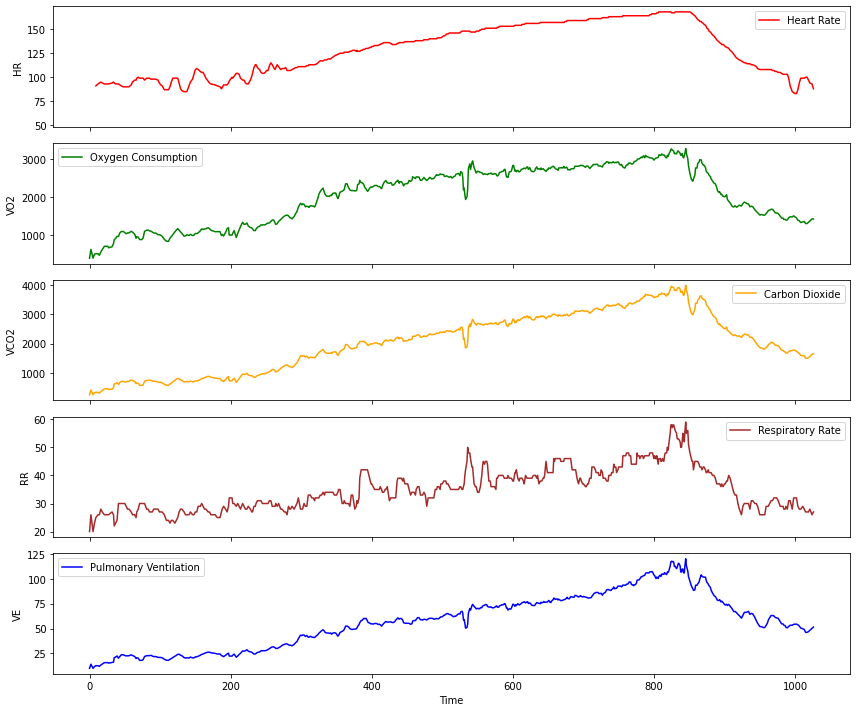

In [151]:
# Method 1: Using matplotlib subplots
df= athlete_100

fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True) # 5 rows, 1 column

axes[0].plot(np.array(df['time']), np.array(df['HR']), label='Heart Rate', color='red')
axes[0].set_ylabel('HR')
axes[0].legend()

axes[1].plot(np.array(df['time']), np.array(df['VO2']), label='Oxygen Consumption', color='green')
axes[1].set_ylabel('VO2')
axes[1].legend()

axes[2].plot(np.array(df['time']), np.array(df['VCO2']), label='Carbon Dioxide', color='orange')
axes[2].set_ylabel('VCO2')
axes[2].legend()

axes[3].plot(np.array(df['time']), np.array(df['RR']), label='Respiratory Rate', color='brown')
axes[3].set_ylabel('RR')
axes[3].legend()

axes[4].plot(np.array(df['time']), np.array(df['VE']), label='Pulmonary Ventilation', color='blue')
axes[4].set_ylabel('VE')
axes[4].set_xlabel('Time')
axes[4].legend()


plt.tight_layout()
plt.show()



### 73. Print first 10 records of the subject_info based on ID, without using head() method.

In [152]:
# using iloc we can access the rows of a dataframe
subject_df.iloc[: 11]    

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0   10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1   11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2   12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3   13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4   13.7    53.8   169.7      40.0         25.3    Male  341   341_1   
5   13.8    53.4   171.0      42.0         24.4    Male  341   341_2   
6   14.0    46.0   160.0      40.0         25.3    Male  343   343_1   
7   14.1    50.0   168.9      42.0         24.2    Male  330   330_1   
8   14.1    47.2   160.2      40.0         25.2    Male  338   338_1   
9   14.1    49.7   160.1      40.0         25.8    Male  339   339_1   
10  14.1    46.6   161.5      41.0         26.5    Male  343   343_5   

   Age Category   BSA bsa_category  
0         Child  1.49          Low  
1         Child  1.31          Low  
2         Child  1.43          Low  
3          Teen  1.94      Average  
4          Teen  1.59          Low  
5          Teen  1.59          Low  
6          Teen  1.43          Low  
7          Teen  1.53          Low  
8          Teen  1.45          Low  
9          Teen  1.49          Low  
10         Teen  1.45          Low

### 74. Determine the treadmill speed range and age range in which you observe the highest average heart rate.

In [ ]:
# min and max speed for each ID_test is the treadmill speed range.

# ID_test, Minspeed, Maxspeed, Minage, Maxage, max_averageHR, 

### 75. Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.

### 76. List the participants ID and test _ID who started their warm up with speed less than 5km/h ?

In [154]:
# Filter rows where speed less than 5 km/h
speed5_df = test_df[test_df['Speed'] < 5]
speed5_df.head(10)

time  Speed    HR    VO2   VCO2    RR    VE ID_test  ID
0     0    0.0   NaN  198.0  233.0  15.0   8.9     1_1   1
1     4    0.0   NaN  286.0  328.0  16.0  10.9     1_1   1
2    10    0.0   NaN  245.0  258.0  10.0   7.9     1_1   1
3    14    0.0   NaN  234.0  252.0  11.0   8.2     1_1   1
4    19    0.0   NaN  250.0  271.0  12.0   8.9     1_1   1
5    22    0.0  61.0  247.0  271.0  13.0   9.1     1_1   1
6    26    0.0  62.0  240.0  264.0  13.0   9.1     1_1   1
7    29    0.0  63.0  252.0  275.0  14.0   9.3     1_1   1
8    35    0.0  64.0  252.0  275.0  14.0   9.3     1_1   1
9    36    0.0  64.0  259.0  289.0  18.0  10.3     1_1   1

In [155]:
filtered_df = speed5_df.drop(columns = ['HR','VO2','VCO2', 'RR', 'VE'])
#filtered_df.head()

In [156]:
#List of participants ID and ID_test with warm up speed less than 5km/h
df = filtered_df.drop_duplicates(subset=['ID', 'ID_test','Speed'])
df.head(10) #601 rows total

time  Speed ID_test   ID
0          0    0.0     1_1    1
30       112    4.9     1_1    1
34003   1076    0.0   138_1  138
50402      0    0.0   163_1  163
81158   1070    0.0   201_1  201
87045     32    3.0   213_1  213
87076    115    3.5   213_1  213
87105    195    4.0   213_1  213
87123    240    4.5   213_1  213
101128   617    0.0   235_1  235

In [157]:
# unique participants ID and test _ID
unique_df = df.drop_duplicates(subset=['ID', 'ID_test'])
unique_df.head(10) #315 rows

time  Speed ID_test   ID
0          0    0.0     1_1    1
34003   1076    0.0   138_1  138
50402      0    0.0   163_1  163
81158   1070    0.0   201_1  201
87045     32    3.0   213_1  213
101128   617    0.0   235_1  235
106085   936    0.0   244_1  244
106718  1264    0.0   245_1  245
107521     0    0.0   247_1  247
108606     0    0.0   249_1  249

### 77. Calculate the mean VO2 max for male and female athletes in the Get Phase.

In [158]:
Speed  = test_df.groupby('ID')
# taking max speed of the ID
max_speed = Speed['Speed'].max().reset_index()
max_speed.columns = ['ID', 'MaxSpeed']
max_speed['Sex'] = subject_i['Sex']
max_speed.head()

ID  MaxSpeed     Sex
0   1      18.1  Female
1   2      16.3  Female
2   3      18.1    Male
3   4      16.2  Female
4   5      14.4    Male

In [159]:
VO2_max = test_df.groupby('ID_test')
VO2_max_df = VO2_max['VO2'].max().reset_index()
VO2_max_df.columns = ['ID_test', 'Max_VO2']
VO2_max_df['Sex'] = subject_i['Sex']
VO2_max_df.head()

ID_test  Max_VO2     Sex
0   100_1   3272.0  Female
1   101_1   3093.0  Female
2   102_1   3935.0    Male
3   103_1   3861.0  Female
4   104_1   3568.0    Male

In [160]:
# FINAL: The mean VO2 max for male and female athletes in the Get Phase.
gender_mean_VO2_max  = VO2_max_df.groupby('Sex')['Max_VO2'].mean()
gender_mean_VO2_max

Sex
Female    3491.813793
Male      3572.473684
Name: Max_VO2, dtype: float64

### 78. If you consider cool down time as the recovery period after reaching peak speed, display the participant details who has taken the longest Cool Down time.


In [112]:
#minimum time at minimum speed---> warmup
#max time , max speed
#maximum time at minimim speed ---> cool dowm

            
           


### 79. Identify the athlete who recorded the highest treadmill speed during the tests.

In [161]:
maxspeed_row_id = test_df['Speed'].idxmax()
maxspeed_row = test_df.iloc[maxspeed_row_id]
#print(maxspeed_row)
print("The ID of the athlete who recorded the highest treadmill speed during the test is", maxspeed_row['ID'])

The ID of the athlete who recorded the highest treadmill speed during the test is 431


### 80. Show the oxygen consumption trend analysis among women athletes across different age groups 